<a href="https://colab.research.google.com/github/Shreyo2/AD-CTR-ANALYSIS-AND-FORECASTING/blob/main/Market_Basket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install -U kaleido
!pip show kaleido
!pip install --upgrade kaleido
!pip show kaleido

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Name: kaleido
Version: 0.2.1
Summary: Static image export for web-based visualization libraries with zero dependencies
Home-page: UNKNOWN
Author: Jon Mease
Author-email: jon@plotly.com
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: 
Name: kaleido
Version: 0.2.1
Summary: Static image export for web-based visualization libraries with zero dependencies
Home-page: UNKNOWN
Author: Jon Mease
Author-email: jon@plotly.com
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: 


In [8]:
import numpy as np
import pandas as pd
from itertools import permutations
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
import networkx as nx
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
import plotly
#import igraph as ig
from plotly.graph_objs import *
df = pd.read_csv("/content/Groceries data.csv")
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1808,21-07-2015,tropical fruit,2015,7,21,1
1,2552,01-05-2015,whole milk,2015,5,1,4
2,2300,19-09-2015,pip fruit,2015,9,19,5
3,1187,12-12-2015,other vegetables,2015,12,12,5
4,3037,02-01-2015,whole milk,2015,1,2,4


In [9]:
print(len(df['Member_number'].unique()))
print(len(df['itemDescription'].unique()))

# review the value counts
freq_items = df['itemDescription'].value_counts()
freq_items.head(10)

3898
167


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,count
itemDescription,
whole milk,2502
other vegetables,1898
rolls/buns,1716
soda,1514
yogurt,1334
root vegetables,1071
tropical fruit,1032
bottled water,933
sausage,924


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



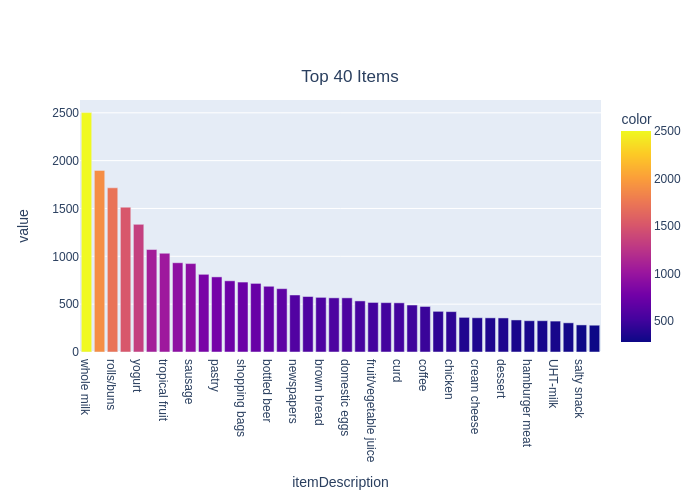

In [10]:
# plot a bar chart to see the top sold items
fig = px.bar(data_frame=freq_items.head(40), title='Top 40 Items', color=freq_items.head(40),
                 labels={
                     "index": "Items",
                     "values": "Quantity",
                     'lift': 'Lift'
                 })
fig.update_layout(title_x=0.5, title_y=0.86)
fig.show("png")

The horizontal bar chart displays the top 40 items from the grocery sales dataset.

In [11]:
# list items by member IDs
user_id = df['Member_number'].unique()
items = [list(df.loc[df['Member_number'] == id, 'itemDescription']) for id in user_id]
print(items[0])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



['tropical fruit', 'long life bakery product', 'meat', 'sugar', 'rolls/buns', 'semi-finished bread', 'whole milk', 'citrus fruit', 'candy', 'napkins']


In [12]:
# create a item matrix
TE = TransactionEncoder()
TE.fit(items)
item_transformed = TE.transform(items)
item_matrix = pd.DataFrame(item_transformed, columns = TE.columns_)
item_matrix.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False


In [13]:
# get the support value by Apriori algorithm
freq_items = apriori(item_matrix, min_support=0.01, use_colnames=True, max_len=2)
freq_items.sort_values(by = "support", ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,support,itemsets
113,0.458184,(whole milk)
69,0.376603,(other vegetables)
84,0.349666,(rolls/buns)
94,0.313494,(soda)
114,0.282966,(yogurt)
...,...,...
414,0.010005,"(butter milk, frankfurter)"
705,0.010005,"(dog food, whole milk)"
882,0.010005,"(newspapers, hygiene articles)"
1106,0.010005,"(waffles, pork)"


In [14]:
# create a datafram with product support, confidence , and lift values
rules = association_rules(freq_items, metric = "confidence", min_threshold = 0)
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(beef),(UHT-milk),0.119548,0.078502,0.010518,0.087983,1.120775,0.001133,1.010396,0.122392
1,(UHT-milk),(beef),0.078502,0.119548,0.010518,0.133987,1.120775,0.001133,1.016672,0.116940
2,(bottled beer),(UHT-milk),0.158799,0.078502,0.014879,0.093700,1.193597,0.002413,1.016769,0.192815
3,(UHT-milk),(bottled beer),0.078502,0.158799,0.014879,0.189542,1.193597,0.002413,1.037933,0.176014
4,(bottled water),(UHT-milk),0.213699,0.078502,0.021293,0.099640,1.269268,0.004517,1.023477,0.269801
...,...,...,...,...,...,...,...,...,...,...
2247,(whole milk),(white wine),0.458184,0.044125,0.023602,0.051512,1.167400,0.003384,1.007788,0.264657
2248,(yogurt),(white wine),0.282966,0.044125,0.016419,0.058024,1.314976,0.003933,1.014754,0.334056
2249,(white wine),(yogurt),0.044125,0.282966,0.016419,0.372093,1.314976,0.003933,1.141944,0.250587
2250,(yogurt),(whole milk),0.282966,0.458184,0.150590,0.532185,1.161510,0.020940,1.158185,0.193926


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



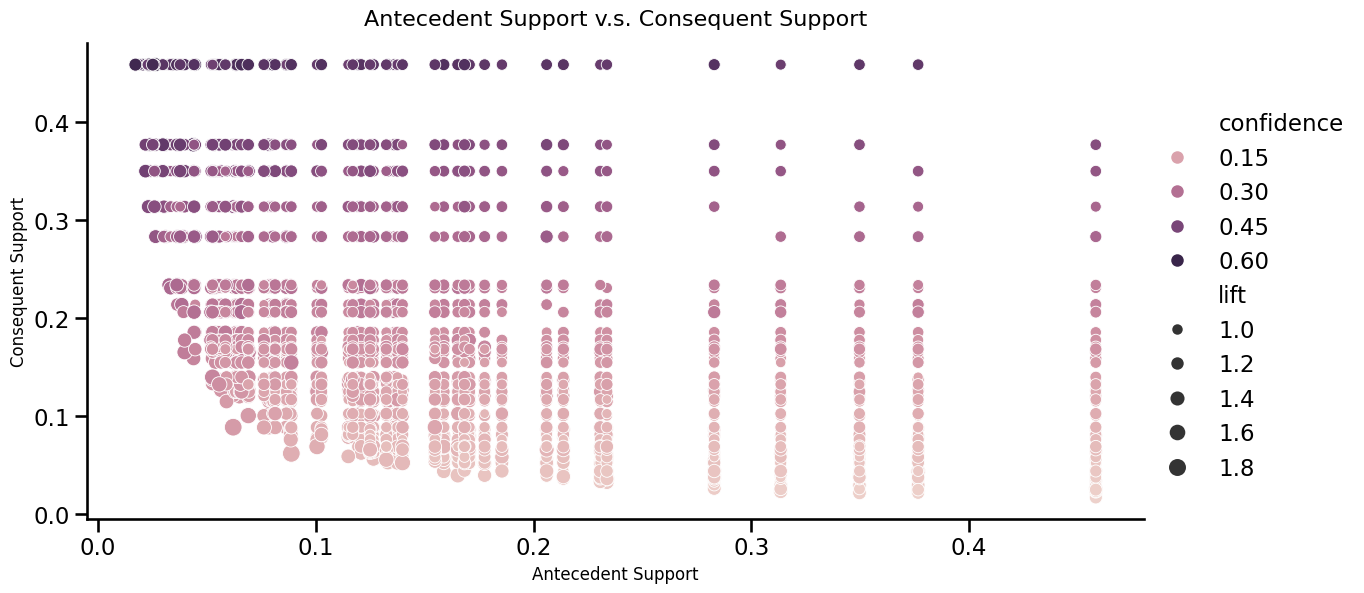

In [15]:
# take a quick look at the distribution of the product combination
sns.set_context("talk")
sns.relplot(x='antecedent support', y='consequent support', data=rules,
            size='lift', hue='confidence', height=6, aspect=2)
plt.title("Antecedent Support v.s. Consequent Support", fontsize=16, y=1.02)
plt.xlabel('Antecedent Support', fontsize=12)
plt.ylabel('Consequent Support', fontsize=12)
plt.show()

The scatterplot helps identify and prioritize strong association rules by visualizing the relationship between support, confidence, and lift.
- **Positive Correlation:** Points cluster along a diagonal line, indicating that higher antecedent support often corresponds with higher consequent support.
- **Lift and Confidence:** Points in the upper-right corner have high lift and confidence, representing strong and statistically significant rules.
- **Outliers:** Points away from the diagonal indicate unusual relationships, such as high lift but low confidence, suggesting statistical significance but low reliability.

In [16]:
# add a column for a Zhang's core
def zhangs_rule(rules):
    rule_support = rules['support'].copy()
    rule_ante = rules['antecedent support'].copy()
    rule_conseq = rules['consequent support'].copy()
    num = rule_support - (rule_ante * rule_conseq)
    denom = np.max((rule_support * (1 - rule_ante).values,
                          rule_ante * (rule_conseq - rule_support).values), axis = 0)
    return num / denom

rules_zhangs_list = zhangs_rule(rules)
rules = rules.assign(zhang = rules_zhangs_list)
rules.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,zhang
0,(beef),(UHT-milk),0.119548,0.078502,0.010518,0.087983,1.120775,0.001133,1.010396,0.122392,0.122392
1,(UHT-milk),(beef),0.078502,0.119548,0.010518,0.133987,1.120775,0.001133,1.016672,0.116940,0.116940
2,(bottled beer),(UHT-milk),0.158799,0.078502,0.014879,0.093700,1.193597,0.002413,1.016769,0.192815,0.192815
3,(UHT-milk),(bottled beer),0.078502,0.158799,0.014879,0.189542,1.193597,0.002413,1.037933,0.176014,0.176014
4,(bottled water),(UHT-milk),0.213699,0.078502,0.021293,0.099640,1.269268,0.004517,1.023477,0.269801,0.269801


In [17]:
# regarding the whole mike has the highest support, choose it as the item for the basket analysis
rules_sel = rules[rules["antecedents"].apply(lambda x: "whole milk" in x)]
rules_sel.sort_values('confidence', ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,zhang
1869,(whole milk),(other vegetables),0.458184,0.376603,0.191380,0.417693,1.109106,0.018827,1.070564,0.181562,0.181562
2048,(whole milk),(rolls/buns),0.458184,0.349666,0.178553,0.389698,1.114484,0.018342,1.065592,0.189591,0.189591
2186,(whole milk),(soda),0.458184,0.313494,0.151103,0.329787,1.051973,0.007465,1.024310,0.091184,0.091184
2251,(whole milk),(yogurt),0.458184,0.282966,0.150590,0.328667,1.161510,0.020940,1.068076,0.256640,0.256640
2227,(whole milk),(tropical fruit),0.458184,0.233710,0.116470,0.254199,1.087672,0.009388,1.027473,0.148768,0.148768
...,...,...,...,...,...,...,...,...,...,...,...
1313,(whole milk),(frozen dessert),0.458184,0.023089,0.012057,0.026316,1.139766,0.001479,1.003314,0.226326,0.226326
749,(whole milk),(canned vegetables),0.458184,0.020523,0.011544,0.025196,1.227674,0.002141,1.004793,0.342277,0.342277
2087,(whole milk),(salt),0.458184,0.022832,0.011288,0.024636,1.079004,0.000826,1.001849,0.135137,0.135137
1179,(whole milk),(dog food),0.458184,0.017188,0.010005,0.021837,1.270428,0.002130,1.004752,0.392871,0.392871


In [18]:
# get the most important 5 items that customers would buy after purchasing whole milk
rules_support = rules_sel['support'] >= rules_sel['support'].quantile(q = 0.95)
rules_confi = rules_sel['confidence'] >= rules_sel['confidence'].quantile(q = 0.95)
rules_lift = rules_sel['lift'] > 1
rules_zhang = rules_sel['zhang'] > 0
rules_best = rules_sel[rules_support & rules_confi & rules_lift & rules_zhang]
rules_best

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,zhang
1869,(whole milk),(other vegetables),0.458184,0.376603,0.191380,0.417693,1.109106,0.018827,1.070564,0.181562,0.181562
2048,(whole milk),(rolls/buns),0.458184,0.349666,0.178553,0.389698,1.114484,0.018342,1.065592,0.189591,0.189591
2186,(whole milk),(soda),0.458184,0.313494,0.151103,0.329787,1.051973,0.007465,1.024310,0.091184,0.091184
2227,(whole milk),(tropical fruit),0.458184,0.233710,0.116470,0.254199,1.087672,0.009388,1.027473,0.148768,0.148768
2251,(whole milk),(yogurt),0.458184,0.282966,0.150590,0.328667,1.161510,0.020940,1.068076,0.256640,0.256640


In [19]:
# prepare the top 10 persentile items for visualization
rules_eda = rules.copy(deep=True)
rules_support_eda = rules_eda['support'] >= rules_eda['support'].quantile(q = 0.9)
rules_confi_eda = rules_eda['confidence'] >= rules_eda['confidence'].quantile(q = 0.9)
rules_lift_eda = rules_eda['lift'] > 1
rules_zhang_eda = rules_eda['zhang'] > 0
rules_best_eda = rules_eda[rules_support_eda & rules_confi_eda & rules_lift_eda & rules_zhang_eda]
rules_best_eda.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,zhang
110,(beef),(other vegetables),0.119548,0.376603,0.050795,0.424893,1.128223,0.005773,1.083966,0.129082,0.129082
136,(beef),(whole milk),0.119548,0.458184,0.064135,0.536481,1.170886,0.009360,1.168919,0.165762,0.165762
298,(bottled beer),(other vegetables),0.158799,0.376603,0.068497,0.431341,1.145345,0.008692,1.096257,0.150857,0.150857
306,(bottled beer),(rolls/buns),0.158799,0.349666,0.063109,0.397415,1.136555,0.007582,1.079240,0.142829,0.142829
330,(bottled beer),(whole milk),0.158799,0.458184,0.085428,0.537964,1.174124,0.012669,1.172672,0.176297,0.176297


In [20]:
# remove the parentheses in the antecedents and consequents columns
rules_best_eda['antecedents'] = rules_best_eda['antecedents'].apply(lambda a: ', '.join(list(a)))
rules_best_eda['consequents'] = rules_best_eda['consequents'].apply(lambda a: ', '.join(list(a)))
rules_best_eda.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,zhang
110,beef,other vegetables,0.119548,0.376603,0.050795,0.424893,1.128223,0.005773,1.083966,0.129082,0.129082
136,beef,whole milk,0.119548,0.458184,0.064135,0.536481,1.170886,0.009360,1.168919,0.165762,0.165762
298,bottled beer,other vegetables,0.158799,0.376603,0.068497,0.431341,1.145345,0.008692,1.096257,0.150857,0.150857
306,bottled beer,rolls/buns,0.158799,0.349666,0.063109,0.397415,1.136555,0.007582,1.079240,0.142829,0.142829
330,bottled beer,whole milk,0.158799,0.458184,0.085428,0.537964,1.174124,0.012669,1.172672,0.176297,0.176297


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



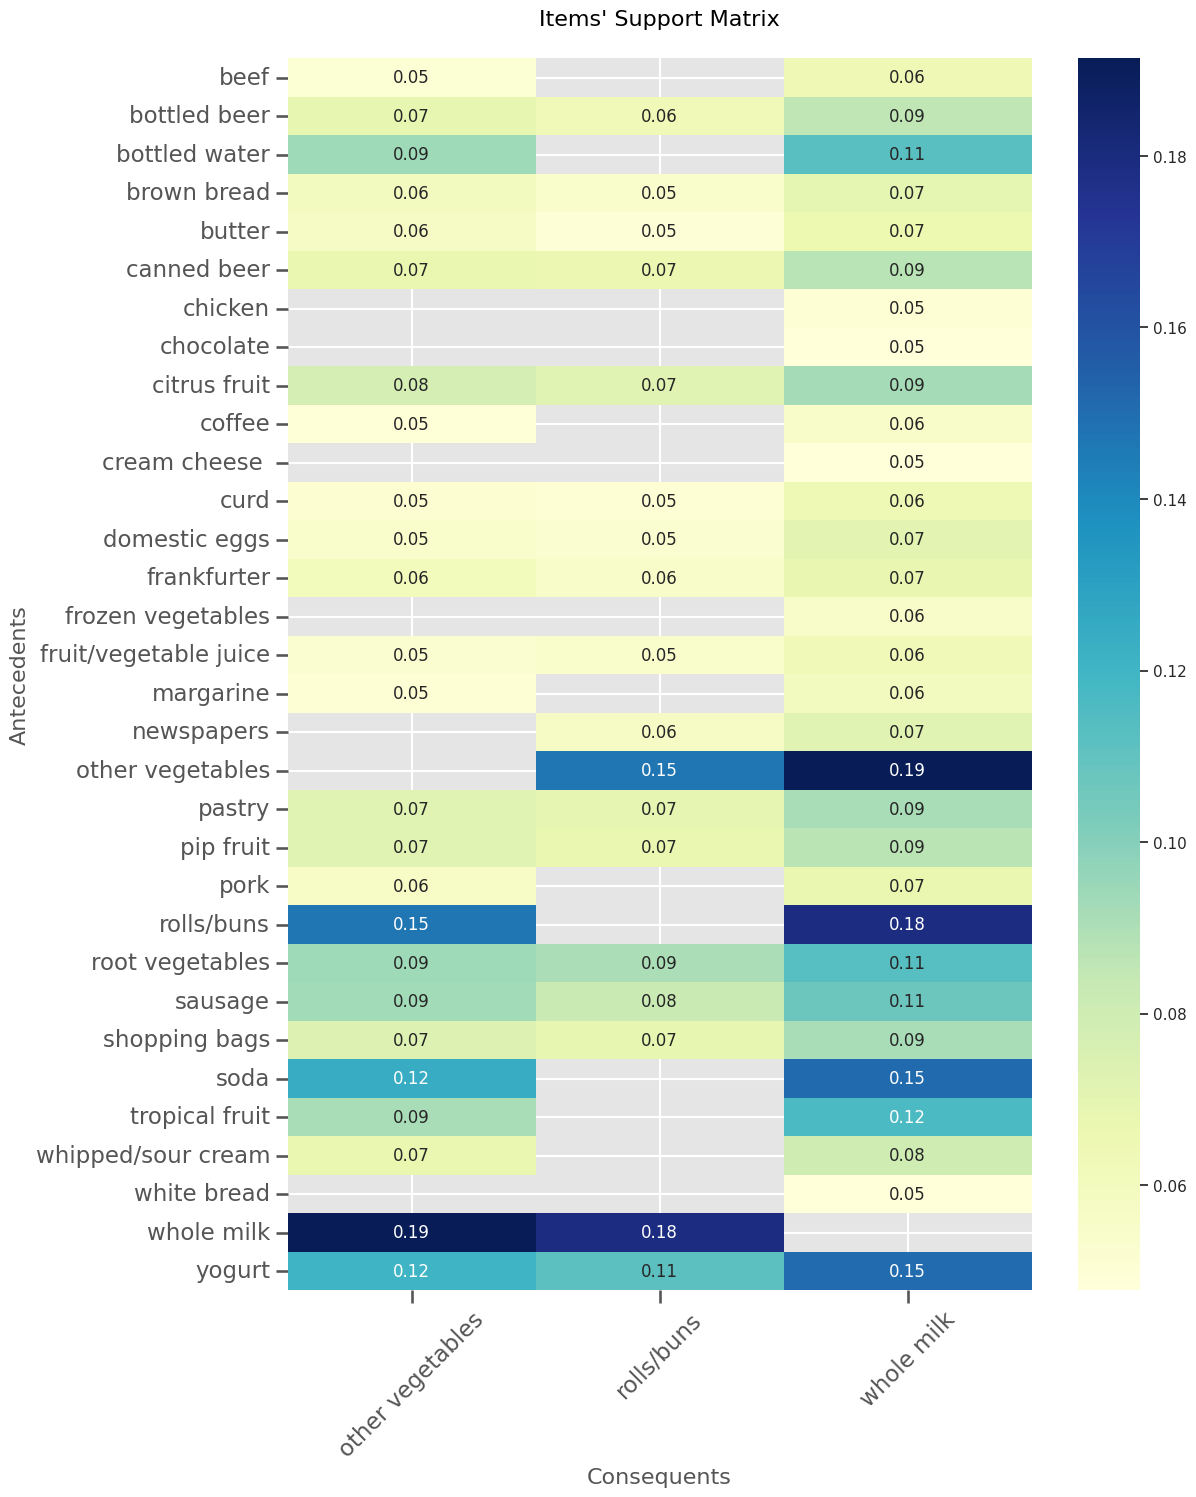

In [21]:
# plot a heatmap to know how strong the association is based on lift values
pivot_support = rules_best_eda.pivot(index='antecedents', columns='consequents', values='support')

sns.set_context("talk")
plt.style.use('ggplot')
plt.subplots(figsize=(12, 16))
sns.set()
ax = sns.heatmap(data=pivot_support, annot=True, fmt='.2f', cmap='YlGnBu', cbar=True)
plt.title("Items' Support Matrix", fontsize=16, y=1.02)
ax.set_xlabel("Consequents",fontsize=16)
ax.set_ylabel("Antecedents",fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show("png")

- The heatmap shows the relationship between different food items and their purchase frequency across three different categories (other vegetables, rolls/buns, and whole milk).
- The color intensity represents the strength of the relationship, with darker colors indicating a stronger association.
- Whole milk is frequently purchased with white bread, while rolls/buns are commonly bought with soda.

In [ ]:
# plot a heatmap to know how strong the association is regarding lift values
pivot_confidence = rules_best_eda.pivot(index='antecedents', columns='consequents', values='confidence')

fig = ff.create_annotated_heatmap(pivot_confidence.to_numpy().round(2),
                                  x=list(pivot_confidence.columns),
                                  y=list(pivot_confidence.index),
                                  colorscale=['grey', 'orange', 'red'],
                                  font_colors=['white', 'white', 'white'])
fig.update_layout(
    template='simple_white',
    autosize=False,
    width=800,
    height=800,
    title="Lift Matrix",
    xaxis_title='Consequents',
    yaxis_title='Antecedents',
    legend_title="Legend Title",
    font=dict(
        family="Caliber",
        size=14,
        color="Black"
    )
)
fig.update_layout(title_x=0.22, title_y=0.98)
fig.update_traces(showscale=True)
fig.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



This plot shows the correlation between different food items and three different factors.
- The color of each bar indicates the strength and direction of the correlation. Red indicates a positive correlation, while gray indicates a negative correlation.
- The darker the color, the stronger the correlation.
- There is a strong positive correlation between tropical fruit and the first factor. This means that people who buy a lot of tropical fruit also tend to have high values for the first factor.

In [ ]:
# plot the network to see the connections between the top 10 percentile items
network_A = list(rules_best_eda["antecedents"].unique())
network_B = list(rules_best_eda["consequents"].unique())
node_list = list(set(network_A+network_B))
G = nx.Graph()
for i in node_list:
    G.add_node(i)
for i,j in rules_best_eda.iterrows():
    G.add_edges_from([(j["antecedents"],j["consequents"])])
pos = nx.spring_layout(G, k=0.5, dim=2, iterations=400)
for n, p in pos.items():
    G.nodes[n]['pos'] = p

edge_trace = go.Scatter(
    x=[],
    y=[],
    line=dict(width=0.5,color='#888'),
    hoverinfo='none',
    mode='lines')
for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    edge_trace['x'] += tuple([x0, x1, None])
    edge_trace['y'] += tuple([y0, y1, None])

node_trace = go.Scatter(
    x=[],
    y=[],
    text=[],
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=15,
        colorbar=dict(
            thickness=10,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line=dict(width=0)))
for node in G.nodes():
    x, y = G.nodes[node]['pos']
    node_trace['x'] += tuple([x])
    node_trace['y'] += tuple([y])

for node, adjacencies in enumerate(G.adjacency()):
    node_trace['marker']['color']+=tuple([len(adjacencies[1])])
    node_info = str(adjacencies[0]) +' has {} connections'.format(str(len(adjacencies[1])))
    node_trace['text']+=tuple([node_info])

fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='Connection of Top 10 Percentile Items',
                titlefont=dict(size=16),
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)))
fig.update_layout(title_x=0.5, title_y=0.96)
iplot(fig)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



The plot is a network graph visualizing the connections between the top 10 percentile items in a dataset.
The plot reveals a highly interconnected network with a few central nodes acting as hubs. These hubs have a large number of connections and play a crucial role in facilitating communication and information flow within the network.

In [ ]:
#Scatter plot to see where the best consequents of whole milk are
rules_fix = rules.copy(deep=True)
rules_fix['antecedents'] = rules_fix['antecedents'].apply(lambda a: ', '.join(list(a)))
rules_fix['consequents'] = rules_fix['consequents'].apply(lambda a: ', '.join(list(a)))

fig=go.Figure()
fig.add_trace(
    go.Scatter(x=rules_fix['support'], y=rules_fix['zhang'], name='All Combinations', mode='markers', opacity=0.3)
)
fig.add_trace(
    go.Scatter(x=rules_best['support'], y=rules_best['zhang'], name='Top 5 Consequents', mode='markers')
)

annotaion_01={'x':'0.191380', 'y':'0.181562', 'showarrow':True, 'arrowhead':4, 'xshift':-2,'yshift':8,'text':'Other Vegetables', 'textangle':-90, 'font':{'size':12, 'color':'green'}}
annotaion_02={'x':'0.178553', 'y':'0.189591', 'showarrow':True, 'arrowhead':4, 'xshift':-2,'yshift':8,'text':'Rolls/buns', 'textangle':-90,'font':{'size':12, 'color':'green'}}
annotaion_03={'x':'0.151103', 'y':'0.091184', 'showarrow':True, 'arrowhead':4, 'xshift':-2,'yshift':8,'text':'Soda', 'textangle':-90,'font':{'size':12, 'color':'green'}}
annotaion_04={'x':'0.116470', 'y':'0.148768', 'showarrow':True, 'arrowhead':4, 'xshift':-2,'yshift':8,'text':'Tropical Fruit', 'textangle':-90,'font':{'size':12, 'color':'green'}}
annotaion_05={'x':'0.150590', 'y':'0.256640', 'showarrow':True, 'arrowhead':4, 'xshift':-2,'yshift':8,'text':'Yogurt', 'textangle':-90,'font':{'size':12, 'color':'green'}}

fig.update_layout({
    'annotations':[annotaion_01, annotaion_02, annotaion_03,
      annotaion_04, annotaion_05],
      'showlegend':True, 'legend':{'x':0.76, 'y':0.04, 'bgcolor':'rgb(246, 228, 129)'}
      })
fig.update_xaxes(
        title_text = "Support",
        title_font = {"size": 16},
        title_standoff = 12)
fig.update_yaxes(
        title_text = "Confidence",
        title_font = {"size": 16},
        title_standoff = 12)
fig.update_layout(title='Contribution of The Top Items', title_x=0.5, title_y=0.86)
fig.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



The plot shows that most combinations have low support and confidence, indicating they occur infrequently and are not strong predictors of other items. However, a few combinations have higher support and confidence, such as Yogurt and Tropical Fruit, suggesting they are purchased together more often and may be useful for targeted promotions or recommendations.


In [ ]:
# the comparison between the sopport and confidence of all combinations
fig = px.scatter(rules_fix, x='support', y='confidence',
                 color='lift', hover_data=['antecedents', 'confidence'],
                 labels={
                     "support": "Support",
                     "confidence": "Confidence",
                     'lift': 'Lift'
                 },
                title="Support v.s. Confidence")
fig.update_layout(title_x=0.5, title_y=0.86)
fig.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



- **Positive Correlation:** Higher support generally leads to higher confidence.
- **High Lift Rules:** Rules with high lift indicate strong, non-trivial associations.
- **Trade-off:** There's often a trade-off between support and confidence.
- **Outliers:** Outliers may indicate unique or interesting rules worth further investigation.

In [ ]:
# plot a network to show the connections of all combinations
network_A = list(rules_fix["antecedents"].unique())
network_B = list(rules_fix["consequents"].unique())
node_list = list(set(network_A+network_B))
G = nx.Graph()
for i in node_list:
    G.add_node(i)
for i,j in rules_fix.iterrows():
    G.add_edges_from([(j["antecedents"],j["consequents"])])
pos = nx.spring_layout(G, k=0.5, dim=2, iterations=400)
for n, p in pos.items():
    G.nodes[n]['pos'] = p

edge_trace = go.Scatter(
    x=[],
    y=[],
    line=dict(width=0.5,color='#888'),
    hoverinfo='none',
    mode='lines')
for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    edge_trace['x'] += tuple([x0, x1, None])
    edge_trace['y'] += tuple([y0, y1, None])

node_trace = go.Scatter(
    x=[],
    y=[],
    text=[],
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='electric',
        reversescale=False,
        color=[],
        size=8,
        colorbar=dict(
            thickness=10,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line=dict(width=0)))
for node in G.nodes():
    x, y = G.nodes[node]['pos']
    node_trace['x'] += tuple([x])
    node_trace['y'] += tuple([y])

for node, adjacencies in enumerate(G.adjacency()):
    node_trace['marker']['color']+=tuple([len(adjacencies[1])])
    node_info = str(adjacencies[0]) +' has {} connections'.format(str(len(adjacencies[1])))
    node_trace['text']+=tuple([node_info])

fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='All Item Network',
                titlefont=dict(size=16),
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)))
fig.update_layout(title_x=0.5, title_y=0.96)
iplot(fig)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



This network graph reveals patterns in purchasing behavior, highlighting which items are commonly bought together.
- The highlighted node, cat food, has 9 connections, indicating it is frequently purchased with 9 other items.
- The color and size of the nodes may represent additional information, such as the number of connections or the item's overall popularity.